# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')   # Read the CSV file into a Pandas Dataframe
data.head()   # Peak into the first 5 rows of the dataset

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
data.shape    # Shape (rows, columns) of the dataset

(21263, 82)

In [4]:
data.info()   # Information about the columns of the dataset - name, datatype, count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [5]:
# Does this dataset have any missing values?

if(data.isnull().values.any() == True):
  print("This dataset has some missing values which need to be handled")
  data = data.dropna()  # Rows with missing values (if any) are dropped

else:
  print("This dataset has no missing values. No action required.")

This dataset has no missing values. No action required.


In [6]:
# Does this dataset have any duplicate rows?

if(data.duplicated().values.any() == True):
  ndup = data[data.duplicated()].shape[0]
  print(f"This dataset has {ndup} duplicated rows")
  data = data.drop_duplicates()  # Rows with duplicate values (if any) are dropped
  print("\nThe duplicate rows have been dropped from the dataset now")

else:
  print("This dataset has no duplicated rows. No action required")



This dataset has 66 duplicated rows

The duplicate rows have been dropped from the dataset now


In [7]:
# Dataset shape after handling missing values and duplicates
data.shape

(21197, 82)

In [8]:
data.describe()     # Gives a descriptive statistical summary of the data columns

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,...,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000
mean,4.120300,87.544201,72.945331,71.253164,58.474874,1.166782,1.065103,115.751945,33.204053,44.436401,...,3.148856,3.052542,3.051485,1.297020,1.053977,2.042553,1.480890,0.839692,0.674168,34.494532
std,1.438282,29.643136,33.460789,30.990774,36.615381,0.364712,0.401225,54.584784,26.966285,20.019732,...,1.189878,1.044637,1.173221,0.392834,0.380121,1.243242,0.977545,0.485002,0.456038,34.276465
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.522475,52.143839,58.041225,35.247208,0.972995,0.781227,78.899680,16.799962,32.890369,...,2.116279,2.267933,2.090896,1.060857,0.778998,1.000000,0.921250,0.451754,0.306892,5.380000
50%,4.000000,84.922750,60.689236,66.361592,39.873869,1.199541,1.148465,122.906070,26.601500,45.123500,...,2.605455,2.615321,2.428047,1.368922,1.169665,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.374260,85.982703,78.019689,73.056021,1.444537,1.360388,154.119320,38.336200,59.356406,...,4.007317,3.662842,3.909523,1.589027,1.331531,3.000000,1.910400,1.200000,1.021023,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


# Feature Selection

Creating an alternate dataset with certain features selected based on their correlation values. The bottom 25 percentile of the features ranked by their correlation values are dropped.

(array([3., 1., 2., 0., 0., 4., 1., 7., 2., 4., 1., 1., 4., 0., 3., 3., 0.,
        1., 0., 0., 0., 4., 1., 0., 2., 1., 3., 2., 1., 4., 3., 1., 2., 1.,
        2., 6., 6., 2., 1., 2.]),
 array([-0.63192366, -0.59810156, -0.56427946, -0.53045736, -0.49663526,
        -0.46281316, -0.42899106, -0.39516896, -0.36134686, -0.32752476,
        -0.29370266, -0.25988057, -0.22605847, -0.19223637, -0.15841427,
        -0.12459217, -0.09077007, -0.05694797, -0.02312587,  0.01069623,
         0.04451833,  0.07834043,  0.11216253,  0.14598463,  0.17980672,
         0.21362882,  0.24745092,  0.28127302,  0.31509512,  0.34891722,
         0.38273932,  0.41656142,  0.45038352,  0.48420562,  0.51802772,
         0.55184982,  0.58567192,  0.61949401,  0.65331611,  0.68713821,
         0.72096031]),
 <BarContainer object of 40 artists>)

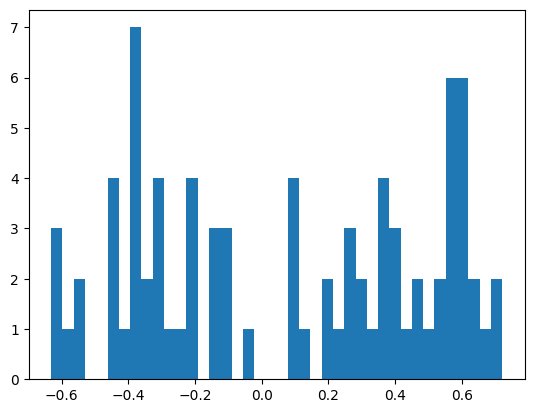

In [9]:
# Histogram of correlation values of features with target variable critical_temp

correlation = data.corr()
correlation = correlation.drop('critical_temp', axis=0)
plt.hist(correlation['critical_temp'], bins=40)

In [10]:
# Inspecting the correlation value for each feature

for k, v in correlation['critical_temp'].items():
    print(f"{k}, {v}")

number_of_elements, 0.600394055182847
mean_atomic_mass, -0.11317839649303417
wtd_mean_atomic_mass, -0.3119832502072971
gmean_atomic_mass, -0.22994106405006937
wtd_gmean_atomic_mass, -0.3694840714111939
entropy_atomic_mass, 0.5428941726044171
wtd_entropy_atomic_mass, 0.6265356613492065
range_atomic_mass, 0.4916424215328923
wtd_range_atomic_mass, -0.3372375169225366
std_atomic_mass, 0.378519448391443
wtd_std_atomic_mass, 0.35892821196282804
mean_fie, 0.10140062987501358
wtd_mean_fie, 0.3978883959339062
gmean_fie, -0.025680476288429257
wtd_gmean_fie, 0.3428140319387177
entropy_fie, 0.5671556479141354
wtd_entropy_fie, 0.3877026432771749
range_fie, 0.6001786440355417
wtd_range_fie, 0.29963177976562727
std_fie, 0.5410910690832423
wtd_std_fie, 0.5814422035843121
mean_atomic_radius, 0.10610167692790742
wtd_mean_atomic_radius, -0.29606092702537734
gmean_atomic_radius, -0.14266782717596035
wtd_gmean_atomic_radius, -0.4042285854629204
entropy_atomic_radius, 0.5582491219463678
wtd_entropy_atomic_r

In [17]:
# Drop every row in corr_abs, where the value of that row is less than or equal to 0.260928 and get the names of the rows dropped

feature_names = []

corr_abs = correlation['critical_temp'].abs()
corr_abs = corr_abs[corr_abs < corr_abs.quantile(0.25)]

for k, v in corr_abs.items():
    feature_names.append(k)

data_fs = data.copy()

# Dropping columns that have a correlation value less than 0.26 (25% of the columns of the dataset)

for col_name in feature_names:
    data_fs = data_fs.drop(col_name, axis=1)

data_fs.info() # Inspecting the remaining columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number_of_elements             21197 non-null  int64  
 1   wtd_mean_atomic_mass           21197 non-null  float64
 2   wtd_gmean_atomic_mass          21197 non-null  float64
 3   entropy_atomic_mass            21197 non-null  float64
 4   wtd_entropy_atomic_mass        21197 non-null  float64
 5   range_atomic_mass              21197 non-null  float64
 6   wtd_range_atomic_mass          21197 non-null  float64
 7   std_atomic_mass                21197 non-null  float64
 8   wtd_std_atomic_mass            21197 non-null  float64
 9   wtd_mean_fie                   21197 non-null  float64
 10  wtd_gmean_fie                  21197 non-null  float64
 11  entropy_fie                    21197 non-null  float64
 12  wtd_entropy_fie                21197 non-null 

In [ ]:
# Plotting Scatterplots of selected features against target variable along with correlation value

features=[]
for k, v in correlation['critical_temp'].items():
  if abs(v)>0.5:
    features.append(k)

for k, v in correlation['critical_temp'].items():
  if abs(v)>0.5:
    try:
        data.plot(kind='scatter', x=k, y='critical_temp', alpha=0.5)
        plt.title(f"Correlation: {v}")
        plt.figure(figsize=(10, 10))

    except ValueError:
        break;

# Baseline Model - Linear Regression

## Without Feature Selection or Scaling

In [27]:
# Import Scikit Learn's train_test_split to split 'data' into 0.8 train and 0.2 test

from sklearn.model_selection import train_test_split

X = data.drop('critical_temp', axis=1)
y = data['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model and fit it to the training data

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Get the model's score on the testing data

print('\nR2 score on test data:\n', model.score(X_test, y_test))

# Get the model's intercept

print('\nIntercept: ', model.intercept_)

# Get the model's coefficients

print('\nCoefficients: ', model.coef_)


R2 score on test data:
 0.7353599049008277

Intercept:  -17.22853060306239

Coefficients:  [-3.09507908e+00  8.41641994e-01 -8.89921694e-01 -4.91659752e-01
  6.11205910e-01 -3.41077399e+01  4.81118660e+00  2.04170441e-01
  3.98143036e-02 -5.22476944e-01  6.68546173e-02  1.48566506e-01
 -2.19443136e-01 -1.47743693e-01  2.42218557e-01 -1.21350716e+02
  4.28194601e+01  6.58596203e-02  2.14650173e-02 -1.94739313e-01
 -8.07829424e-03 -4.07538012e-01  3.19648879e+00  3.94621389e-02
 -2.77676835e+00  7.86474325e+01  4.34005941e+01  2.07312535e-01
 -1.03318277e-01 -3.95836579e-01 -3.30474649e-01 -5.36959944e-03
  3.93268922e-04  1.73164140e-03  1.89532150e-03  1.73390340e+01
 -2.13767137e+01 -1.55583329e-03 -2.13889022e-04  6.52676013e-03
 -1.94049248e-03 -1.09176251e-01  5.39529409e-01  1.98464364e-01
 -6.08598995e-01  3.73650996e+00 -2.19865013e+01 -3.81534182e-01
 -1.34725488e-01  1.28813466e+00 -5.77008779e-01  1.63763505e+00
 -1.88256104e+00 -1.42743648e+00  1.52568229e+00 -1.99151928e+0

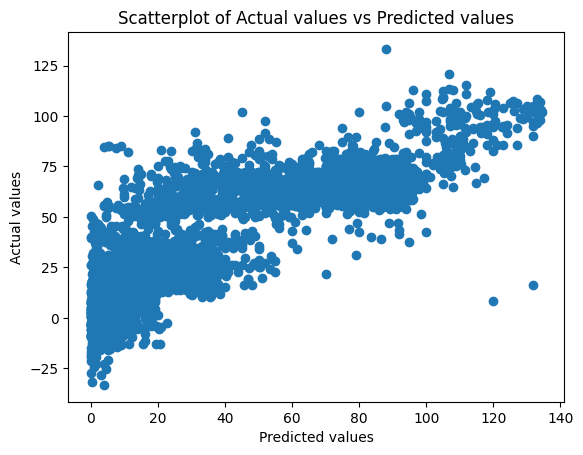

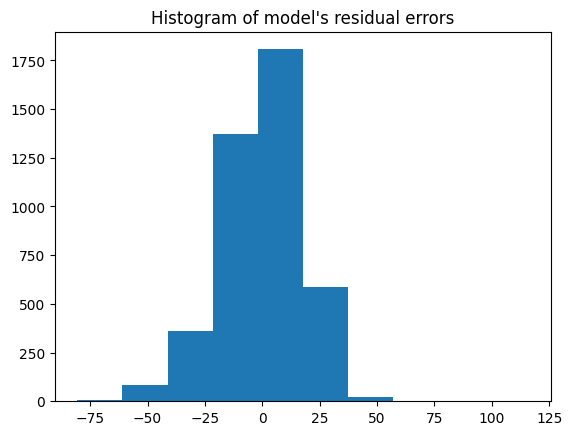

In [28]:
# Get the model's predictions on the test data

y_pred = model.predict(X_test)

# Plot a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test, y_pred)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Plot a histogram of the residuals

plt.hist(y_test - y_pred)
plt.title("Histogram of model's residual errors")
plt.show()

In [25]:
# Do a cross validation of the model using 10 folds and print it in terms of avg +/- std

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)
print('\n', scores.mean(), '+/-', scores.std())


 0.7337205416664668 +/- 0.01813007522420121


## With Feature Selection

Using the `data_fs` dataset, which is a selection of only the top 75 percentile correlated features.

In [29]:
## Using feature selected dataset

# Import Scikit Learn's train_test_split to split 'data' into 0.8 train and 0.2 test

from sklearn.linear_model import LinearRegression

X_fs = data_fs.drop('critical_temp', axis=1)
y_fs = data_fs['critical_temp']

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

# Creating a linear regression model and fit it to the training data

from sklearn.model_selection import train_test_split

model_fs = LinearRegression()
model_fs.fit(X_train_fs, y_train_fs)

# Getting the model's score on the testing data

print('\nR2 score on test data (w/ feature selection): \n', model_fs.score(X_test_fs, y_test_fs))

# Getting the model's intercept

print('\nIntercept: ', model_fs.intercept_)

# Getting the model's coefficients

print('\nCoefficients: ', model_fs.coef_)


R2 score on test data (w/ feature selection): 
 0.7232760543024528

Intercept:  -18.34436924787414

Coefficients:  [-5.51102801e-01 -9.16046353e-02  1.69780981e-01 -3.09180432e+01
  2.09016469e+01  2.29636084e-01 -9.21691667e-02 -1.01032513e-01
 -2.72391766e-01  4.20280507e-02 -2.82597132e-02  5.32545115e+01
  4.13885830e+01  7.62106444e-02  6.61107508e-03 -1.21413499e-01
 -9.85695636e-02  2.14632013e+00 -2.04209721e+00 -1.56884993e+00
  2.98640073e+01  1.93757697e-01 -8.08994244e-04 -7.82843021e-01
  7.88987052e-02 -7.62902826e-04 -3.20503253e-03 -1.51611286e-03
  3.95105679e-03 -1.10971754e+01 -1.16580622e+01 -3.45833998e-04
  1.04840891e-03 -2.39816916e-02 -1.81683560e+01 -3.32892621e-01
  8.82225962e-01 -1.62767193e-01  3.73549524e-01 -1.19085397e+00
 -3.80025291e-01  9.45998100e-01  1.48560896e+00  2.43853476e+01
  5.26538144e-01 -1.18439888e-01  7.71239207e-01  1.97292797e-02
 -5.22922494e-01 -1.03396117e-01 -3.21969600e-01  3.70660088e-01
 -1.65284164e-01  9.67928230e+00 -2.391

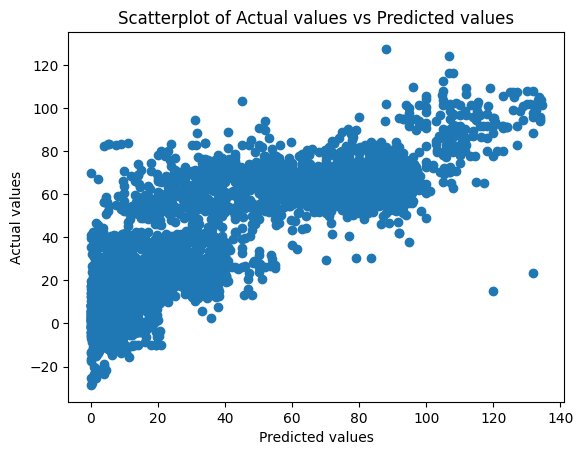

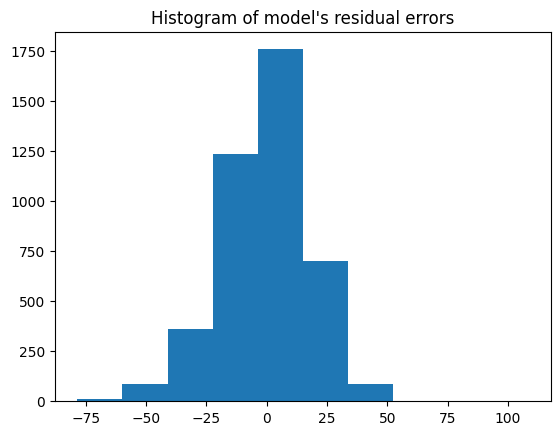

In [30]:
# Get the model's predictions on the test data

y_pred_fs = model_fs.predict(X_test_fs)

# Plot a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test_fs, y_pred_fs)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Plot a histogram of the residuals

plt.hist(y_test_fs - y_pred_fs)
plt.title("Histogram of model's residual errors")
plt.show()

In [31]:
# Doing a cross validation of the model using 10 folds and print it in terms of avg +/- std

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_fs, X_train_fs, y_train_fs, cv=10)
print('\n', scores.mean(), '+/-', scores.std())


 0.7165469130217834 +/- 0.019210403416915323


## With Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Standard Scaling with feature selection

sc.fit(X_train_fs)

X_train_std = sc.transform(X_train_fs)
X_test_std = sc.transform(X_test_fs)

In [33]:
## Linear Regression with standard scaling

# Creating a linear regression model and fit it to the training data

model_std = LinearRegression()
model_std.fit(X_train_std, y_train_fs)

# Getting the model's score on the testing data

print('\nR2 score on test data (w/ feature selection and standardization:\n', model_std.score(X_test_std, y_test_fs))

# Getting the model's intercept

print('\nIntercepts', model_std.intercept_)

# Getting the model's coefficients

print('\nCoefficients: ', model_std.coef_)


R2 score on test data (w/ feature selection and standardization:
 0.7232760543024641

Intercepts 34.479813792239185

Coefficients:  [-7.93958330e-01 -3.07429615e+00  6.23024972e+00 -1.13017607e+01
  8.40123154e+00  1.25691464e+01 -2.50181647e+00 -2.02715114e+00
 -5.45491592e+00  6.01420908e+00 -3.38134201e+00  2.03802224e+01
  1.38474698e+01  2.35588566e+01  1.48573174e+00 -1.33305206e+01
 -1.25904070e+01  6.18073061e+01 -7.31366260e+01 -5.90384720e-01
  1.21696847e+01  1.30101233e+01 -2.82468396e-02 -1.79024569e+01
  1.99047645e+00 -2.17965509e+00 -1.03766251e+01 -5.62990350e+00
  1.57521976e+01 -3.80865977e+00 -3.74275809e+00 -1.41595311e+00
  2.52799865e+00 -6.96617793e-01 -6.24259765e+00 -1.94510295e+01
  1.90588984e+01 -3.29848336e+00  4.21543006e+00 -1.69558473e+01
 -3.82901164e+00  1.24214027e+01  5.60397145e-01  9.05623271e+00
  5.97448951e+00 -4.55285037e+00  3.49507288e+01  6.72566132e-01
 -2.10230534e+01 -1.63898408e+01 -1.38151710e+01  2.22590901e+01
 -1.05072169e+01  1.01

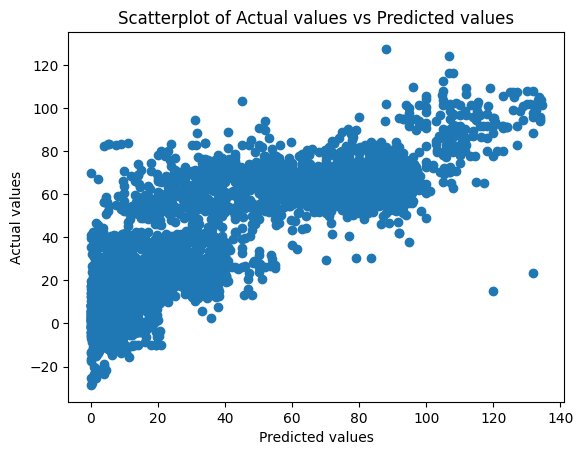

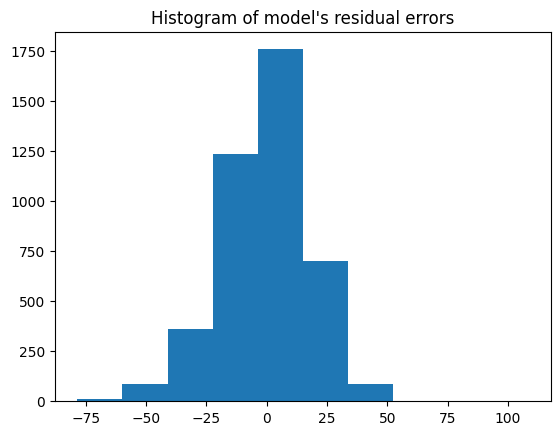

In [34]:
# Get the model's predictions on the test data

y_pred_std = model_std.predict(X_test_std)

# Plot a scatter plot of the model's predictions vs the actual values

plt.scatter(y_test_fs, y_pred_std)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatterplot of Actual values vs Predicted values")
plt.show()
print('\n')

# Plot a histogram of the residuals

plt.hist(y_test_fs - y_pred_std)
plt.title("Histogram of model's residual errors")
plt.show()

In [35]:
# Doing a cross validation of the model using 10 folds and print it in terms of avg +/- std

scores_std = cross_val_score(model_std, X_train_std, y_train_fs, cv = 10)

print('\n', scores_std.mean(), '+/-', scores_std.std())


 0.7165469130217896 +/- 0.01921040341692294
